<a href="https://colab.research.google.com/github/ChristianFel7/2020-2-exercicio-revisao-refatoracao/blob/master/TransferLearning_CatsxDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

using kaggle API to train the dataset/Utilizando a API do Kaggle para baixar nosso dataset

In [29]:
!pip install kaggle

configuring the path of Kaggle.json file/ Configurando o arquivo json do kaggle
Link para download:
https://www.kaggle.com/settings -> API -> Create new token

Need to create an account, accept the competition rules and create a team./Necessário criar uma conta, aceitar as regras da competição e criar um time.

In [30]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Baixando o Dataset (.ZIP)

In [31]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


Extraindo o dataset zipado

In [32]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("the dataset is extracted/ O dataset foi extraido")

the dataset is extracted/ O dataset foi extraido


Extraindo o arquivo de teste

In [33]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("the dataset training is extracted/ O dataset de treino foi extraido")

the dataset training is extracted/ O dataset de treino foi extraido


Contando a quantidade de arquivos na pasta de treinamento





In [34]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images/número de imagens: ', file_count)

Number of images/número de imagens:  25000


Printing the name of images/Printando o nome das imagens

In [35]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.9211.jpg', 'dog.12046.jpg', 'cat.11426.jpg', 'cat.730.jpg', 'cat.3400.jpg', 'dog.10372.jpg', 'dog.9423.jpg', 'dog.6990.jpg', 'cat.10287.jpg', 'dog.1555.jpg', 'dog.543.jpg', 'dog.1100.jpg', 'cat.10218.jpg', 'dog.8501.jpg', 'dog.9706.jpg', 'cat.12299.jpg', 'dog.6551.jpg', 'dog.11302.jpg', 'cat.5302.jpg', 'cat.1906.jpg', 'dog.5076.jpg', 'cat.3877.jpg', 'dog.9581.jpg', 'cat.7759.jpg', 'cat.10963.jpg', 'dog.3461.jpg', 'cat.538.jpg', 'dog.12257.jpg', 'dog.9352.jpg', 'cat.11119.jpg', 'cat.4506.jpg', 'dog.3716.jpg', 'dog.1325.jpg', 'cat.2214.jpg', 'cat.9474.jpg', 'dog.7330.jpg', 'cat.9697.jpg', 'dog.12465.jpg', 'dog.2033.jpg', 'cat.7922.jpg', 'dog.8206.jpg', 'dog.6130.jpg', 'dog.4333.jpg', 'cat.4484.jpg', 'cat.6304.jpg', 'cat.3988.jpg', 'cat.11251.jpg', 'cat.4076.jpg', 'cat.3905.jpg', 'dog.6524.jpg', 'cat.1697.jpg', 'cat.7912.jpg', 'dog.11213.jpg', 'cat.12002.jpg', 'dog.9272.jpg', 'cat.2604.jpg', 'dog.2374.jpg', 'cat.8774.jpg', 'dog.4071.jpg', 'dog.5299.jpg', 'dog.10987.jpg', 'dog.2293.j

Importing the dependencies/Importando as dependencias

In [36]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats / Mostrando as imagens de gatos e cachorros


> Displaying dogs image/Mostrando cachorros

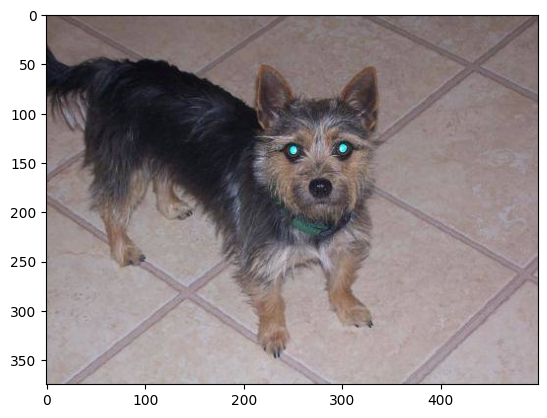

In [46]:
img = mpimg.imread('/content/train/dog.12046.jpg')
imgplot = plt.imshow(img)


> Displaying cats image/Mostrando gatos




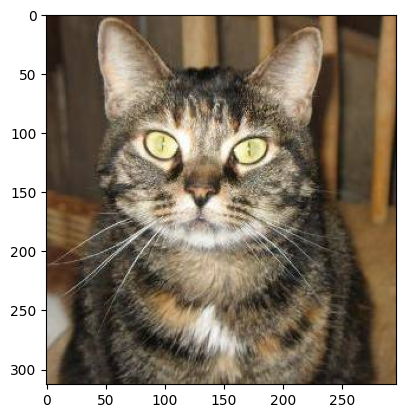

In [47]:
img = mpimg.imread('/content/train/cat.9211.jpg')
imgplot = plt.imshow(img)

Counting cats and dogs images are in the training set / contando quantas imagens de gatos e cachorros tem na pasta de treinamento.

In [39]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  if img_file[0:3] == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images / alterando o tamanho de todas as imagens



> Creating a directory for resized images/ Criando um diretório para as imagens que tiveram seu tamanho alterado



In [49]:
os.mkdir('/content/image_resized')

Creating variables with the directory path of folders training / Criando variáveis com os caminhos dos diretorios da pasta de treinamento

In [51]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

Changing 2500 images and saving in the new folder/Alterando o tamanho de 2500 imagens e salvando na nova pasta

In [52]:

for i in range(2500):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

> Displaying the new image/Mostrando as novas imagens



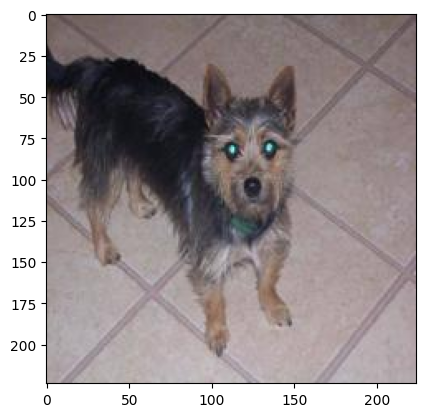

In [55]:
img = mpimg.imread('/content/image_resized/dog.12046.jpg')
imgplot = plt.imshow(img)

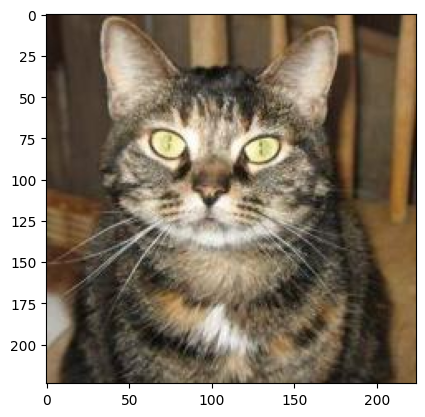

In [56]:
img = mpimg.imread('/content/image_resized/cat.9211.jpg')
imgplot = plt.imshow(img)

Creating labels for resized images / Criando Labels para as novas imagens



> Cats/gatos -> 0

> dogs/cachorros -> 1




In [57]:
file_name_resized = os.listdir('/content/image_resized/')

labels = []

for i in range(2500):
  img_file = file_name_resized[i]
  if img_file[0:3] == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [58]:
print(file_name_resized[0:5])
print(len(file_name_resized))


['cat.9211.jpg', 'dog.12046.jpg', 'cat.11426.jpg', 'cat.730.jpg', 'cat.3400.jpg']
2500


In [59]:
print(labels[0:5])
print(len(labels))


[0, 1, 0, 0, 0]
2500


Counting images of cats and dogs in 2500 resized images/Contando a quantidade de cachorros e gatos nas 2500 imagens redimensionadas*

In [60]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1219 1281]


Converting the resize images to numpy arrays/Convertendo as 2500 imagens para arrays numpy

In [61]:
import cv2
import glob

In [63]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']
files= []

[files.extend(glob.glob(image_directory + '*.'+ e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [64]:
print(dog_cat_images)

[[[[ 23  28  43]
   [ 23  28  43]
   [ 22  27  42]
   ...
   [ 86 136 178]
   [ 82 128 169]
   [ 71 118 156]]

  [[ 23  28  43]
   [ 23  28  43]
   [ 22  27  42]
   ...
   [ 85 135 177]
   [ 81 127 168]
   [ 69 116 154]]

  [[ 23  28  43]
   [ 23  28  43]
   [ 22  27  42]
   ...
   [ 84 134 176]
   [ 80 126 167]
   [ 69 116 154]]

  ...

  [[ 94 122 146]
   [ 94 122 146]
   [ 91 118 144]
   ...
   [ 60 100 129]
   [ 62 102 130]
   [ 63 103 131]]

  [[ 95 123 147]
   [ 94 122 146]
   [ 91 118 144]
   ...
   [ 61 101 130]
   [ 64 104 132]
   [ 67 107 135]]

  [[ 96 124 148]
   [ 95 123 147]
   [ 91 118 144]
   ...
   [ 60 100 129]
   [ 66 106 134]
   [ 71 111 139]]]


 [[[ 67  72  87]
   [ 76  81  96]
   [ 85  90 105]
   ...
   [102  96 113]
   [ 94  88 105]
   [ 87  81  98]]

  [[ 78  83  98]
   [ 85  90 105]
   [ 90  95 110]
   ...
   [ 96  90 107]
   [ 89  83 100]
   [ 86  80  97]]

  [[ 87  92 107]
   [ 90  95 110]
   [ 94  99 114]
   ...
   [ 88  82  99]
   [ 85  79  96]
   [ 85  79

In [65]:
type(dog_cat_images)

numpy.ndarray

In [66]:
print(dog_cat_images.shape)

(2500, 224, 224, 3)


In [67]:
X = dog_cat_images
Y = np.asarray(labels)

**Train test split**/** Treinando o modelo de treinamento**

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(2500, 224, 224, 3) (2000, 224, 224, 3) (500, 224, 224, 3)


2000 -> training images
2000 -> test images



> Scalling the data/escalando os dados




In [70]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [71]:
print(X_train_scaled)

[[[[0.09019608 0.12156863 0.11764706]
   [0.09019608 0.12156863 0.11764706]
   [0.09019608 0.12156863 0.11764706]
   ...
   [0.15294118 0.18823529 0.20392157]
   [0.15686275 0.19215686 0.20784314]
   [0.15686275 0.19215686 0.20784314]]

  [[0.10588235 0.1372549  0.13333333]
   [0.10588235 0.1372549  0.13333333]
   [0.10588235 0.1372549  0.13333333]
   ...
   [0.15294118 0.18823529 0.20392157]
   [0.15686275 0.19215686 0.20784314]
   [0.15686275 0.19215686 0.20784314]]

  [[0.1254902  0.14901961 0.14509804]
   [0.1254902  0.14901961 0.14509804]
   [0.12156863 0.14509804 0.14117647]
   ...
   [0.15686275 0.19215686 0.20784314]
   [0.15686275 0.19215686 0.20784314]
   [0.16078431 0.19607843 0.21176471]]

  ...

  [[0.39215686 0.41176471 0.40784314]
   [0.39607843 0.41568627 0.41176471]
   [0.39607843 0.41568627 0.41176471]
   ...
   [0.46666667 0.53333333 0.54509804]
   [0.4627451  0.52941176 0.54117647]
   [0.45098039 0.51764706 0.52941176]]

  [[0.38039216 0.4        0.39607843]
   [0.3

**Building the neural network / Connstruindo a rede neural**

In [72]:
import tensorflow as tf
import tensorflow_hub as hub

In [73]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras import utils as np_utils
import keras

In [75]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [76]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [77]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [78]:
model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
63/63 [==============================] - 77s 1s/step - loss: 0.1692 - acc: 0.9385
Epoch 2/10
63/63 [==============================] - 74s 1s/step - loss: 0.0623 - acc: 0.9785
Epoch 3/10
63/63 [==============================] - 73s 1s/step - loss: 0.0462 - acc: 0.9820
Epoch 4/10
63/63 [==============================] - 74s 1s/step - loss: 0.0356 - acc: 0.9900
Epoch 5/10
63/63 [==============================] - 81s 1s/step - loss: 0.0293 - acc: 0.9930
Epoch 6/10
63/63 [==============================] - 74s 1s/step - loss: 0.0252 - acc: 0.9935
Epoch 7/10
63/63 [==============================] - 75s 1s/step - loss: 0.0201 - acc: 0.9965
Epoch 8/10
63/63 [==============================] - 81s 1s/step - loss: 0.0182 - acc: 0.9975
Epoch 9/10
63/63 [==============================] - 75s 1s/step - loss: 0.0151 - acc: 0.9990
Epoch 10/10
63/63 [==============================] - 75s 1s/step - loss: 0.0129 - acc: 0.9995


In [79]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

16/16 [==============================] - 32s 2s/step - loss: 0.0378 - acc: 0.9860
Test Loss = 0.03780323266983032
Test Accuracy = 0.9860000014305115


Predictive System / Sistema preditivo

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')